In [1]:
import matplotlib
%matplotlib nbagg
from matplotlib import pyplot

In [2]:
from statiskit import (linalg,
                       core,
                       pgm)

In [3]:
import math
import os

In [4]:
if not 'K' in os.environ:
    os.environ['K'] = str(5)
K = int(os.environ.get('K'))
simulation = !jupyter nbconvert --ExecutePreprocessor.timeout=3600 --to notebook --execute sampling.ipynb --output sampling.ipynb
graph = pgm.read_gml(os.path.join('results', 'graph.gml'))
data = core.read_csv(os.path.join('results', 'data.csv'))
data


,V0,V1,V2,V3,V4
0,$-0.07$,$1.25$,$-0.38$,$-0.05$,$0.39$
1,$1.75$,$1.00$,$-0.06$,$0.11$,$-0.29$
2,$4.41$,$1.53$,$0.38$,$0.05$,$-1.46$
3,$0.96$,$1.26$,$1.26$,$0.55$,$2.41$
4,$0.67$,$-1.08$,$-1.42$,$-1.00$,$0.56$


In [18]:
LAMBDA = os.environ.get('L',"AUTRE")
LAMBDA


'AUTRE'

In [19]:
if LAMBDA == 'LINEAIR':
    !Rscript  lasso.R
elif LAMBDA == "AUTRE":
    !Rscript lasso1.R

In [20]:
graphs = []
for filepath in os.listdir('.'):
    if filepath.startswith('lasso_'):
        adjmat = linalg.read_csv(filepath)
        graphs.append(pgm.UndirectedGraph(adjmat))
graphs = sorted(graphs, key = lambda graph: graph.nb_edges)

CPU times: user 17 µs, sys: 0 ns, total: 17 µs
Wall time: 24.1 µs


<IPython.core.display.Javascript object>


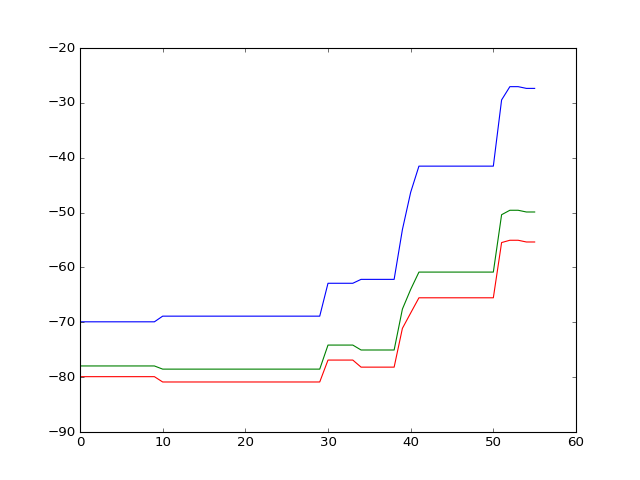

In [21]:
LLHs = []
BICs = []
AICs = []

%time
for graph in graphs:
    try:
        mle = pgm.graphical_gaussian_estimation(algo='scd',
                                                data=data,
                                                graph=graph)

        dist = mle.estimated.copy()

        LLHs.append(2 * dist.loglikelihood(data))
        
    except:
        LLHs.append(float("nan"))
    finally:
        
        BICs.append(LLHs[-1] - dist.nb_parameters * math.log(len(data.events)))
        AICs.append(LLHs[-1] - dist.nb_parameters * 2)

fig = pyplot.figure()
axes = fig.add_subplot(111)
axes.plot(LLHs)
axes.plot(BICs)
axes.plot(AICs)

In [22]:
aic = AICs.index(max(AICs))
bic = BICs.index(max(BICs))


<IPython.core.display.Javascript object>


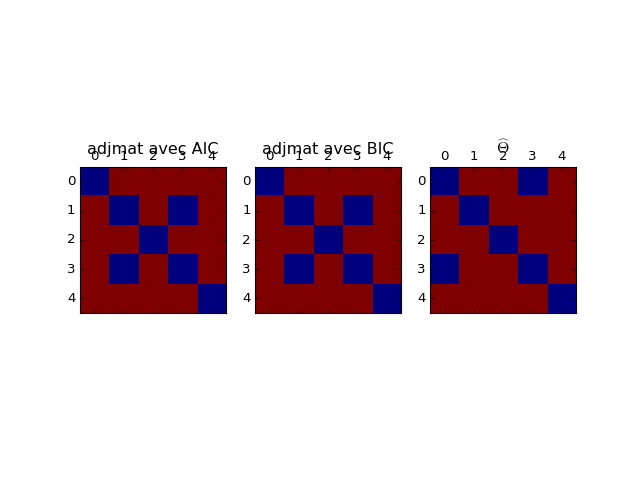

In [23]:
fig = pyplot.figure()
axes = graphs[aic].to_matrix().plot(axes = fig.add_subplot(131))
axes.set_title('adjmat avec AIC')
axes = graphs[bic].to_matrix().plot(axes = fig.add_subplot(132))
axes.set_title('adjmat avec BIC')
axes =  graph.to_matrix().plot(axes = fig.add_subplot(133))
axes.set_title('$ \widehat \Theta$')